# Домашняя работа №17

Требования к анализу:

    построить не менее 4 визуализаций различных видов;
    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1. Построим гистограмму распределения значений содержания сахара

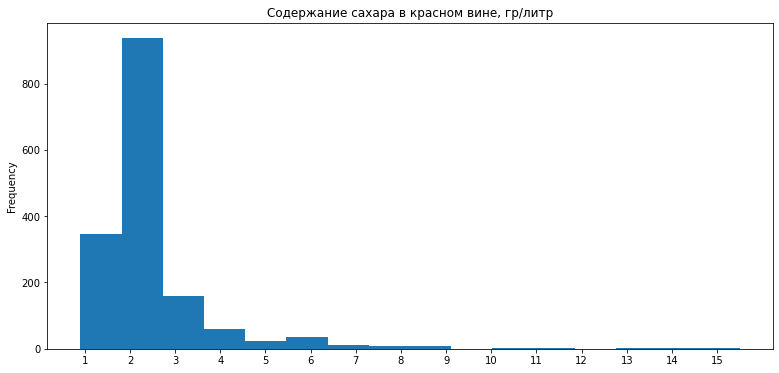

In [36]:
df['residual sugar'].plot(kind='hist', 
                   bins=16,
                   title='Содержание сахара в красном вине, гр/литр',
                   xticks=range(1, 16))

Вывод: содержание сахара в большинстве представленных красных вин примерно 2-3 гр/литр

2. Построим график зависимости уровня кислотности от содержания сахара

In [70]:
acid_level = pd.DataFrame()
acid_level = df[['residual sugar','fixed acidity']]
acid_level.head()

,residual sugar,fixed acidity
0,1.9,7.4
1,2.6,7.8
2,2.3,7.8
3,1.9,11.2
4,1.9,7.4


In [71]:
acid_level.set_index('residual sugar').head()

,fixed acidity
residual sugar,
1.9,7.4
2.6,7.8
2.3,7.8
1.9,11.2
1.9,7.4


Text(0, 0.5, 'Содержание сахара')

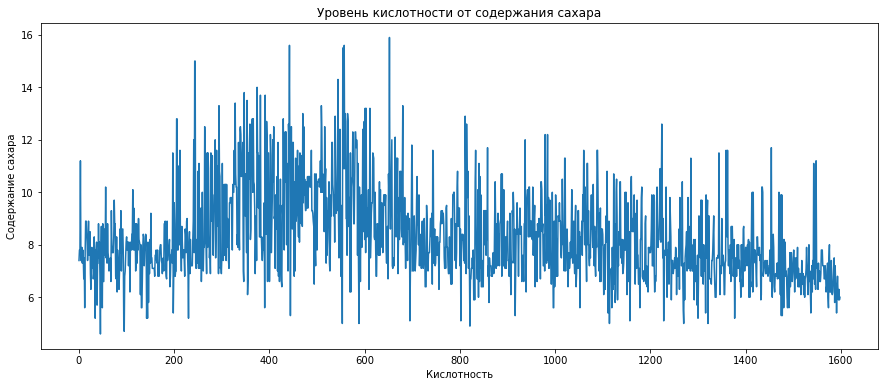

In [72]:
plt.plot(acid_level.index, acid_level['fixed acidity'])
plt.title('Уровень кислотности от содержания сахара')
plt.xlabel('Кислотность')
plt.ylabel('Содержание сахара')

Вывод: из представленных видов вина есть некоторые, которые обладают низкой кислотностью при небольшом содержании сахара. Но в основном видна тенденция, указывающая на то, что чем ниже содержание сахара, тем выше уровень кислотности.

3. Посмотрим как сопоставляeтся качество вина и средний уровень кислотности

In [98]:
acid_by_quality = df[['fixed acidity', 'quality']].groupby('quality').mean()
acid_by_quality

,fixed acidity
quality,
3,8.360000
4,7.779245
5,8.167254
6,8.347179
7,8.872362
8,8.566667


Text(0.5, 0, 'Качество')

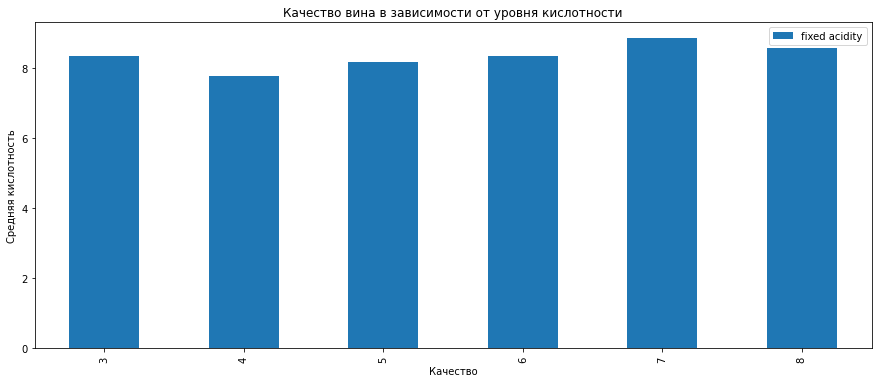

In [99]:
ax = acid_by_quality.plot(kind='bar', title='Качество вина в зависимости от уровня кислотности')
ax.set_ylabel('Средняя кислотность')
ax.set_xlabel('Качество')

Вывод: интересно, что качество вина не зависит от уровня кислотности, примерно одно среднее значение кислотности на всех уровнях качества. Отсюда понимаем, что для получения высококачественного вина необходимы некоторые другие факторы.

4. А что на счет уровня крепости?

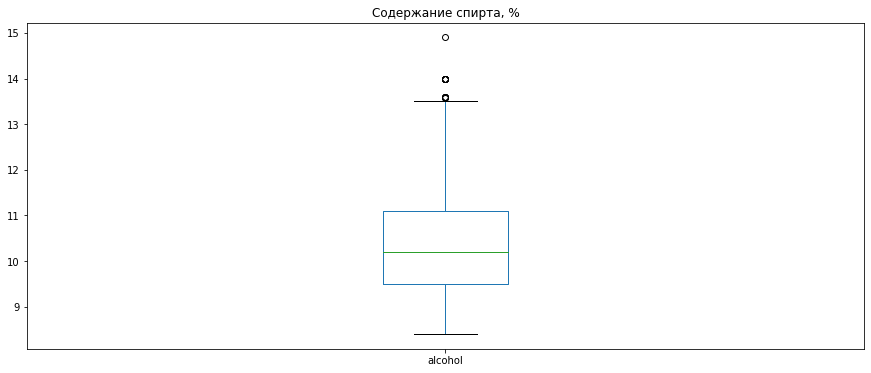

In [104]:
df.alcohol.plot(kind='box',
                   title='Содержание спирта, %')

Выводы: представленное вино имеет широкий разброс крепости. От 8ми с неболишим градусов до 13.5. Мы можем утверждать что большинство представленных образцов это полусухие и сухие вина. Есть несколько выбросов - это могут быть сладкие, полусладкие вина или ликеры. 
В среднем содержание спирта примерно 10%.